# Trabalho final de ciência de dados
### Caio Dutra, Joao Márcio e Natan Fernandes

O conjunto de dados `Fifa.zip` contém todas as partidas da Copa do Mundo FIFA 2022 do Catar.

Junto com os placares e as seleções, foram relatadas diversas estatísticas para cada partida; por exemplo, assistências, posse de bola, cruzamentos, número de cartões vermelhos e amarelos, passes, faltas, tentativas, mudanças de jogo, impedimentos e o número de vezes que uma determinada área do campo foi cruzada.

Sabendo desses dados, faça as seguintes análises:
1) Análise descritiva das colunas.
2) Os tipos de dados de cada coluna.
3) Verificar se há valores vazios, caso exista preencher com a média.
4) Quais times marcaram mais gols?
5) Quais times tiveram mais assistências?
6) Quais equipes tiveram o maior número total de tentativas de gol?
7) Apresente gráficos para as questões 4, 5 e 6.

## Lendo a base de dados

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

fifa_data = pd.read_csv('fifa_matches.csv')

In [22]:
def update_data(key, value, dictionary):
    """
        Incrementa valores no dicionario
    """
    if key in dictionary:
        value += dictionary[key]
    dictionary[key] = value

In [23]:
def add_data_to_dict(data, column, dictionary):
    """
        Obtém dados de cada time e adicionar no dicionario
    """
    data = data.reset_index()
    for _, row in data.iterrows():
        team_columns = ['team1', 'team2']
        for team_column in team_columns:
            value = int(row[f'{column} {team_column}'])
            team_name = str(row['team1'])
            update_data(team_name, value, dictionary)

In [24]:
def get_and_print_ranking(dictionary, data_name):
    """
        Printa o ranking
    """
    ranking = dict(reversed(sorted(dictionary.items(), key=lambda x: x[1])))
    for i, key in enumerate(ranking):
        print(f'#{i+1} {key} ({ranking[key]} {data_name})')
    return ranking

In [25]:
def print_chart(dictionary, title):
    top_5 = {}
    count = 0
    for key in dictionary:
        if count == 5:
            break

        top_5[key] = dictionary[key]
        count += 1
    
    names = list(top_5.keys())
    values = list(top_5.values())
    
    plt.title(title)
    plt.bar(range(len(top_5)), values, tick_label=names)
    plt.show()

<center>
    <h1>Respostas</h1>
</center>

# 1) Análise descritiva das colunas

| Coluna | Descrição |
|---|---|
| team1 | Nome da equipe 1 |
| team2 | Nome da equipe 2 |
| possession team1 | Posse de bola da equipe 1 (em %) |
| possession team2 | Posse de bola da equipe 2 (em %) |
| possession in contest | Posse de bola disputada (em %) |
| number of goals team1 | Número de gols marcados pela equipe 1 |
| number of goals team2 | Número de gols marcados pela equipe 2 |
| date | Data da partida |
| hour | Hora da partida |
| category | Categoria da partida |
| total attempts team1 | Número total de finalizações da equipe 1 |
| total attempts team2 | Número total de finalizações da equipe 2 |
| conceded team1 | Número de gols sofridos pela equipe 1 |
| conceded team2 | Número de gols sofridos pela equipe 2 |
| goal inside the penalty area team1 | Número de gols marcados pela equipe 1 dentro da área penal |
| goal inside the penalty area team2 | Número de gols marcados pela equipe 2 dentro da área penal |
| goal outside the penalty area team1 | Número de gols marcados pela equipe 1 fora da área penal |
| goal outside the penalty area team2 | Número de gols marcados pela equipe 2 fora da área penal |
| assists team1 | Número de assistências da equipe 1 |
| assists team2 | Número de assistências da equipe 2 |
| on target attempts team1 | Número de finalizações em direção ao gol da equipe 1 |
| on target attempts team2 | Número de finalizações em direção ao gol da equipe 2 |
| off target attempts team1 | Número de finalizações fora do gol da equipe 1 |
| off target attempts team2 | Número de finalizações fora do gol da equipe 2 |
| attempts inside the penalty area team1 | Número de finalizações dentro da área penal da equipe 1 |
| attempts inside the penalty area team2 | Número de finalizações dentro da área penal da equipe 2 |
| attempts outside the penalty area team1 | Número de finalizações fora da área penal da equipe 1 |
| attempts outside the penalty area team2 | Número de finalizações fora da área penal da equipe 2 |
| left channel team1 | Número de finalizações do canal esquerdo da equipe 1 |
| left channel team2 | Número de finalizações do canal esquerdo da equipe 2 |
| left inside channel team1 | Número de finalizações do canal interior esquerdo da equipe 1 |
| left inside channel team2 | Número de finalizações do canal interior esquerdo da equipe 2 |
| central channel team1 | Número de finalizações do canal central da equipe 1 |
| central channel team2 | Número de finalizações do canal central da equipe 2 |
| right inside channel team1 | Número de finalizações do canal interior direito da equipe 1 |
| right inside channel team2 | Número de finalizações do canal interior direito da equipe 2 |
| right channel team1 | Número de finalizações do canal direito da equipe 1 |
| right channel team2 | Número de finalizações do canal direito da equipe 2 |
| total offers to receive team1 | Número total de oportunidades para receber a bola da equipe 1 |
| total offers to receive team2 | Número total de oportunidades para receber a bola da equipe 2 |
| inbehind offers to receive team1 | Número de oportunidades para receber a bola atrás da defesa da equipe 1 |
| inbehind offers to receive team2 | Número de oportunidades para receber a bola atrás da defesa da equipe 2 |
| inbetween offers to receive team1 | Número de oportunidades para receber a bola entre a defesa e o meio-campo da equipe 1 |
| inbetween offers to receive team2 | Número de oportunidades para receber a bola entre a defesa e o meio-campo da equipe 2 |


# 2) Os tipos de dados de cada coluna
| Coluna | Tipo de dado |
|---|---|
| team1 | texto |
| team2 | texto |
| possession team1 | numérico |
| possession team2 | numérico |
| possession in contest | numérico |
| number of goals team1 | numérico |
| number of goals team2 | numérico |
| date | data |
| hour | hora |
| category | texto |
| total attempts team1 | numérico |
| total attempts team2 | numérico |
| conceded team1 | numérico |
| conceded team2 | numérico |
| goal inside the penalty area team1 | numérico |
| goal inside the penalty area team2 | numérico |
| goal outside the penalty area team1 | numérico |
| goal outside the penalty area team2 | numérico |
| assists team1 | numérico |
| assists team2 | numérico |
| on target attempts team1 | numérico |
| on target attempts team2 | numérico |
| off target attempts team1 | numérico |
| off target attempts team2 | numérico |
| attempts inside the penalty area team1 | numérico |
| attempts inside the penalty area team2 | numérico |
| attempts outside the penalty area team1 | numérico |
| attempts outside the penalty area team2 | numérico |
| left channel team1 | numérico |
| left channel team2 | numérico |
| left inside channel team1 | numérico |
| left inside channel team2 | numérico |
| central channel team1 | numérico |
| central channel team2 | numérico |
| right inside channel team1 | numérico |
| right inside channel team2 | numérico |
| right channel team1 | numérico |
| right channel team2 | numérico |
| total offers to receive team1 | numérico |
| total offers to receive team2 | numérico |
| inbehind offers to receive team1 | numérico |
| inbehind offers to receive team2 | numérico |
| inbetween offers to receive team1 | numérico |
| inbetween offers to receive team2 | numérico |
| infront offers to receive team1 | numérico |
| infront offers to receive team2 | numérico |
| receptions between midfield and defensive lines team1 | numérico |
| receptions between midfield and defensive lines team2 | numérico |
| attempted line breaks team1 | numérico |
| attempted line breaks team2 | numérico |
| completed line breaks team1 | numérico |
| completed line breaks team2 | numérico |
| attempted defensive line breaks team1 | numérico |
| attempted defensive line breaks team2 | numérico |
| completed defensive line breaks team1 | numérico |
| completed defensive line breaks team2 | numérico |
| yellow cards team1 | numérico |
| yellow cards team2 | numérico |
| red cards team1 | numérico |
| red cards team2 | numérico |
| fouls against team1 | numérico |
| fouls against team2 | numérico |
| offsides team1 | numérico |
| offsides team2 | numérico |
| passes team1 | numérico |
| passes team2 | numérico |
| passes completed team1 | numérico |
| passes completed team2 | numérico |
| crosses team1 | numérico |
| crosses team2 | numérico |
| crosses completed team1 | numérico |
| crosses completed team2 | numérico |
| switches of play completed team1 | numérico |
| switches of play completed team2 | numérico |
| corners team1 | numérico |
| corners team2 | numérico |
| free kicks team1 | numérico |
| free kicks team2 | numérico |
| penalties scored team1 | numérico |
| penalties scored team2 | numérico |
| goal preventions team1 | numérico |
| goal preventions team2 | numérico |
| own goals team1 | numérico |
| own goals team2 | numérico |
| forced turnovers team1 | numérico |
| forced turnovers team2 | numérico |
| defensive pressures applied team1 | numérico |
| defensive pressures applied team2 | numérico |

## 3) Verificar se há valores vazios, caso exista preencher com a média

In [26]:
if fifa_data.isna().any().any():
    fifa_data.fillna(fifa_data.mean(), errors='coerce', inplace=True)

## 4) Quais times marcaram mais gols?

In [27]:
team_goals = {}
add_data_to_dict(fifa_data, 'number of goals', team_goals)
goals_ranking = get_and_print_ranking(team_goals, 'gols')

#1 ARGENTINA (17 gols)
#2 PORTUGAL (14 gols)
#3 FRANCE (14 gols)
#4 ENGLAND (14 gols)
#5 NETHERLANDS (12 gols)
#6 CROATIA (10 gols)
#7 SPAIN (9 gols)
#8 KOREA REPUBLIC (8 gols)
#9 BRAZIL (8 gols)
#10 CAMEROON (7 gols)
#11 COSTA RICA (6 gols)
#12 JAPAN (6 gols)
#13 QATAR (6 gols)
#14 SERBIA (5 gols)
#15 WALES (5 gols)
#16 POLAND (4 gols)
#17 CANADA (3 gols)
#18 SAUDI ARABIA (3 gols)
#19 ECUADOR (3 gols)
#20 BELGIUM (3 gols)
#21 GERMANY (3 gols)
#22 GHANA (2 gols)
#23 TUNISIA (2 gols)
#24 UNITED STATES (2 gols)
#25 SENEGAL (2 gols)
#26 AUSTRALIA (1 gols)
#27 IRAN (1 gols)
#28 SWITZERLAND (1 gols)
#29 MOROCCO (1 gols)
#30 URUGUAY (0 gols)
#31 MEXICO (0 gols)
#32 DENMARK (0 gols)


## 5) Quais times tiveram mais assistências?

In [28]:
team_assists = {}
add_data_to_dict(fifa_data, 'assists', team_assists)
assists_ranking = get_and_print_ranking(team_assists, 'assistências')

#1 ENGLAND (12 assistências)
#2 FRANCE (11 assistências)
#3 CROATIA (9 assistências)
#4 NETHERLANDS (9 assistências)
#5 PORTUGAL (9 assistências)
#6 CAMEROON (7 assistências)
#7 ARGENTINA (7 assistências)
#8 KOREA REPUBLIC (6 assistências)
#9 JAPAN (6 assistências)
#10 SPAIN (6 assistências)
#11 BRAZIL (5 assistências)
#12 SERBIA (4 assistências)
#13 COSTA RICA (4 assistências)
#14 QATAR (4 assistências)
#15 POLAND (3 assistências)
#16 WALES (3 assistências)
#17 BELGIUM (3 assistências)
#18 SAUDI ARABIA (2 assistências)
#19 TUNISIA (2 assistências)
#20 GHANA (1 assistências)
#21 CANADA (1 assistências)
#22 AUSTRALIA (1 assistências)
#23 IRAN (1 assistências)
#24 ECUADOR (1 assistências)
#25 SWITZERLAND (1 assistências)
#26 GERMANY (1 assistências)
#27 MOROCCO (1 assistências)
#28 UNITED STATES (1 assistências)
#29 SENEGAL (1 assistências)
#30 URUGUAY (0 assistências)
#31 MEXICO (0 assistências)
#32 DENMARK (0 assistências)


## 6) Quais equipes tiveram o maior número total de tentativas de gol?

In [29]:
goal_attempts = {}
add_data_to_dict(fifa_data, 'total attempts', goal_attempts)
goal_attempts_ranking = get_and_print_ranking(team_assists, 'tentativas')

#1 ENGLAND (12 tentativas)
#2 FRANCE (11 tentativas)
#3 CROATIA (9 tentativas)
#4 NETHERLANDS (9 tentativas)
#5 PORTUGAL (9 tentativas)
#6 CAMEROON (7 tentativas)
#7 ARGENTINA (7 tentativas)
#8 KOREA REPUBLIC (6 tentativas)
#9 JAPAN (6 tentativas)
#10 SPAIN (6 tentativas)
#11 BRAZIL (5 tentativas)
#12 SERBIA (4 tentativas)
#13 COSTA RICA (4 tentativas)
#14 QATAR (4 tentativas)
#15 POLAND (3 tentativas)
#16 WALES (3 tentativas)
#17 BELGIUM (3 tentativas)
#18 SAUDI ARABIA (2 tentativas)
#19 TUNISIA (2 tentativas)
#20 GHANA (1 tentativas)
#21 CANADA (1 tentativas)
#22 AUSTRALIA (1 tentativas)
#23 IRAN (1 tentativas)
#24 ECUADOR (1 tentativas)
#25 SWITZERLAND (1 tentativas)
#26 GERMANY (1 tentativas)
#27 MOROCCO (1 tentativas)
#28 UNITED STATES (1 tentativas)
#29 SENEGAL (1 tentativas)
#30 URUGUAY (0 tentativas)
#31 MEXICO (0 tentativas)
#32 DENMARK (0 tentativas)


# 7) Apresente gráficos para as questões 4, 5 e 6 com limite de 5 seleções..

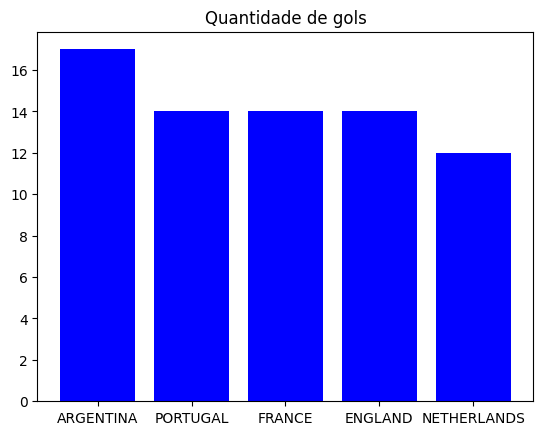

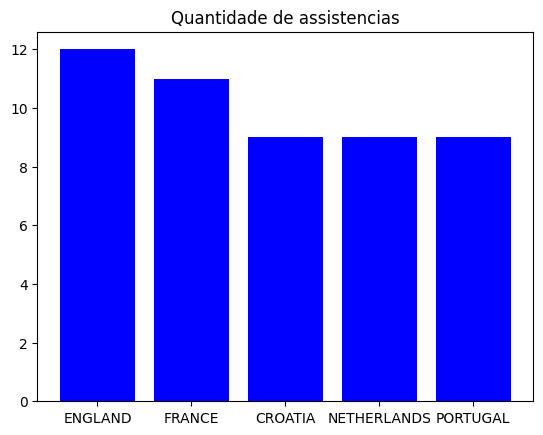

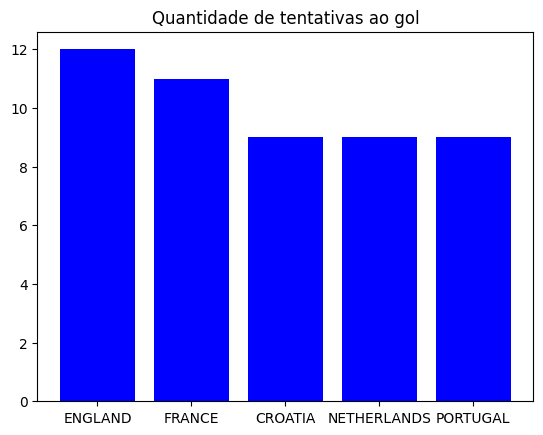

In [30]:
print_chart(goals_ranking, 'Quantidade de gols')
print_chart(assists_ranking, 'Quantidade de assistencias')
print_chart(goal_attempts_ranking, 'Quantidade de tentativas ao gol')